In [117]:
import pandas as pd
import numpy as np
from sklearn.linear_model import LogisticRegression
from sklearn.tree import DecisionTreeClassifier
from sklearn.neighbors import KNeighborsClassifier
from sklearn.discriminant_analysis import LinearDiscriminantAnalysis
from sklearn.naive_bayes import GaussianNB
from sklearn.neural_network import MLPClassifier
from sklearn.svm import SVC

# imports for scaling and splitting data
from sklearn.model_selection import train_test_split
from sklearn.preprocessing import StandardScaler
from sklearn.preprocessing import MinMaxScaler
mms = MinMaxScaler()
std_scaler = StandardScaler()

# imports for results visualization
from sklearn.metrics import accuracy_score, recall_score, f1_score, classification_report
import seaborn as sns
import matplotlib.pyplot as plt


In [57]:
# file paths to mex on Colab
data_file = "sample_data/mex.csv"

In [58]:
# read all data
data = pd.read_csv(data_file, header=None)
seed =100 #useful for random generators
print(data.shape)

(6313, 874)


# Accessing different parts of the collected data

In [59]:
# extract class labels from data
y = data.iloc[:, 873]
print(y.shape)



(6313,)


In [60]:
#extract person IDs
id = data.iloc[:, 0]
print(id.shape)


(6313,)


In [61]:
# extract features from wrist accelerometer data
acw_x = data.iloc[:, 1:181]
print(acw_x.shape)

# standard scaler
acw_x_std = pd.DataFrame(std_scaler.fit_transform(acw_x))
print(acw_x_std.head())




(6313, 180)
        0         1         2         3         4         5         6    \
0  1.570822 -0.606105 -0.545214 -0.567535 -0.583643 -0.510801 -0.514511   
1  1.568518 -0.558339 -0.635455 -0.609960 -0.405455 -0.556832 -0.478476   
2  1.562392 -0.608683 -0.649659 -0.529207 -0.552633 -0.427658 -0.505032   
3  1.525284 -0.329008 -0.428188 -0.500845 -0.464781 -0.474847 -0.479369   
4  1.470394 -0.337318 -0.454094 -0.585985 -0.413694 -0.564471 -0.443044   

        7         8         9    ...       170       171       172       173  \
0 -0.515030 -0.456289 -0.365966  ... -0.401797 -0.343222 -0.322133 -0.315246   
1 -0.489836 -0.483460 -0.473175  ... -0.448168 -0.261374 -0.341414 -0.218815   
2 -0.497296 -0.480918 -0.429061  ... -0.240799 -0.448485 -0.357186 -0.068454   
3 -0.413896 -0.441954 -0.400428  ... -0.310292 -0.180566 -0.323165 -0.346335   
4 -0.496684 -0.374821 -0.455551  ... -0.454730 -0.314492 -0.367541 -0.284978   

        174       175       176       177       178     

In [62]:
# extract features from thigh accelerometer data
act_x = data.iloc[:, 181:361]
print(act_x.shape)

# standard scaler
act_x_std = pd.DataFrame(std_scaler.fit_transform(act_x))
print(act_x_std.head())


(6313, 180)
        0         1         2         3         4         5         6    \
0  0.232013 -0.219166 -0.570326  0.567336 -0.449344  0.491671 -0.104109   
1  0.262948 -0.382942 -0.410501  0.785552 -0.573946 -0.301154 -0.279240   
2  0.154318 -0.587960 -0.119088  0.633877 -0.020377  0.012294 -0.547828   
3  0.233592 -0.560385  0.202102  0.254719  0.023642 -0.135439 -0.406348   
4  0.157150 -0.414837  0.239839 -0.160751  0.169072 -0.501084  0.644300   

        7         8         9    ...       170       171       172       173  \
0 -0.557729  0.952593 -0.043184  ...  0.371373  0.298846 -0.004799 -0.204393   
1 -0.282902  2.067171  1.585547  ... -0.058335  0.847841 -0.031508 -0.061945   
2 -0.110477  2.745026  0.948965  ... -0.410137  0.959579  0.171824  0.371645   
3  1.596799 -0.105832  1.171094  ...  0.263874 -0.406942 -0.138108 -0.155861   
4  0.558064  2.191333  2.094155  ...  0.395289 -0.648194 -0.075533 -0.618318   

        174       175       176       177       178     

In [63]:
# extract features from pressure mat data
pm_x = data.iloc[:, 361:873]
print(pm_x.shape)

# standard scaler
pm_x_std = pd.DataFrame(std_scaler.fit_transform(pm_x))
print(pm_x_std.head())

(6313, 512)
        0         1         2         3         4         5         6    \
0 -0.462956 -0.154266 -0.213578 -0.159938 -0.290723 -0.137551 -0.227481   
1 -0.462956 -0.154266 -0.213578 -0.159938 -0.290723 -0.137551 -0.227481   
2 -0.366417 -0.154266 -0.213578 -0.159938  0.014899 -0.137551 -0.227481   
3 -0.366417 -0.154266 -0.213578 -0.159938  0.014899 -0.137551 -0.227481   
4 -0.340088 -0.154266 -0.213578 -0.159938  0.035724 -0.137551 -0.227481   

        7         8         9    ...       502       503       504       505  \
0 -0.147788 -0.093664 -0.061955  ... -0.282976 -0.337510 -0.359278 -0.312412   
1 -0.147788 -0.093664 -0.061955  ... -0.282976 -0.344634 -0.360164 -0.312621   
2 -0.147788 -0.093664 -0.061955  ... -0.282971 -0.343032 -0.361864 -0.311738   
3 -0.147788 -0.093664 -0.061955  ... -0.283127 -0.348838 -0.364918 -0.312159   
4 -0.147788 -0.093664 -0.061955  ... -0.282815 -0.339013 -0.363301 -0.310261   

        506       507       508       509       510     

In [64]:
# extract wrist and thigh accelerometer data
wt_x = data.iloc[:, 1:361]
print(wt_x.shape)

# standard scaler
wt_x_std = pd.DataFrame(std_scaler.fit_transform(wt_x))
print(wt_x_std.head())

(6313, 360)
        0         1         2         3         4         5         6    \
0  1.570822 -0.606105 -0.545214 -0.567535 -0.583643 -0.510801 -0.514511   
1  1.568518 -0.558339 -0.635455 -0.609960 -0.405455 -0.556832 -0.478476   
2  1.562392 -0.608683 -0.649659 -0.529207 -0.552633 -0.427658 -0.505032   
3  1.525284 -0.329008 -0.428188 -0.500845 -0.464781 -0.474847 -0.479369   
4  1.470394 -0.337318 -0.454094 -0.585985 -0.413694 -0.564471 -0.443044   

        7         8         9    ...       350       351       352       353  \
0 -0.515030 -0.456289 -0.365966  ...  0.371373  0.298846 -0.004799 -0.204393   
1 -0.489836 -0.483460 -0.473175  ... -0.058335  0.847841 -0.031508 -0.061945   
2 -0.497296 -0.480918 -0.429061  ... -0.410137  0.959579  0.171824  0.371645   
3 -0.413896 -0.441954 -0.400428  ...  0.263874 -0.406942 -0.138108 -0.155861   
4 -0.496684 -0.374821 -0.455551  ...  0.395289 -0.648194 -0.075533 -0.618318   

        354       355       356       357       358     

In [65]:
# extract wrist, thigh and pressure mat data
wtp_x = data.iloc[:, 1:873]
print(wtp_x.shape)

# standard scaler
wtp_x_std = pd.DataFrame(std_scaler.fit_transform(wtp_x))
print(wtp_x_std.head())

(6313, 872)
        0         1         2         3         4         5         6    \
0  1.570822 -0.606105 -0.545214 -0.567535 -0.583643 -0.510801 -0.514511   
1  1.568518 -0.558339 -0.635455 -0.609960 -0.405455 -0.556832 -0.478476   
2  1.562392 -0.608683 -0.649659 -0.529207 -0.552633 -0.427658 -0.505032   
3  1.525284 -0.329008 -0.428188 -0.500845 -0.464781 -0.474847 -0.479369   
4  1.470394 -0.337318 -0.454094 -0.585985 -0.413694 -0.564471 -0.443044   

        7         8         9    ...       862       863       864       865  \
0 -0.515030 -0.456289 -0.365966  ... -0.282976 -0.337510 -0.359278 -0.312412   
1 -0.489836 -0.483460 -0.473175  ... -0.282976 -0.344634 -0.360164 -0.312621   
2 -0.497296 -0.480918 -0.429061  ... -0.282971 -0.343032 -0.361864 -0.311738   
3 -0.413896 -0.441954 -0.400428  ... -0.283127 -0.348838 -0.364918 -0.312159   
4 -0.496684 -0.374821 -0.455551  ... -0.282815 -0.339013 -0.363301 -0.310261   

        866       867       868       869       870     

In [66]:
# a few examples of models - keras learners can also be explored
models = []
models.append(('LR', LogisticRegression(max_iter=200, solver='liblinear', multi_class='auto')))
models.append(('LDA', LinearDiscriminantAnalysis()))
models.append(('KNN', KNeighborsClassifier(n_neighbors=5, weights='distance')))
models.append(('CART', DecisionTreeClassifier()))
models.append(('NB', GaussianNB()))
models.append(('SVM', SVC(kernel='rbf', gamma=0.7, C=1.0)))
models.append(('ANN', MLPClassifier(max_iter=2048, random_state=seed)))

# 2.1 Evaluate the role of sensors on classification

## Helper methods

In [133]:
# evaluate each model in turn
target_names = ['Knee roll (Ab)', 'Bridging (Glut)', 'Pelvic tilt (Pain relief)', 'Bilateral Clam (Glut)', 'Extension in Lying (Flexibility)',
                'Prone punches (core)', 'Superman (Back)']

def evaluate_models(X, y, models):
    over_all_results = []
    all_clf_report = []
    for name, model in models:
        print (name, ' Staring...')
        # split data into train and test sets
        X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.2, random_state=seed)
        # fit the model
        model.fit(X_train, y_train)
        # predict on test set
        y_pred = model.predict(X_test)
        # evaluate predictions
        accuracy = accuracy_score(y_test, y_pred, )
        recall = recall_score(y_test, y_pred, average='macro')
        f1 = f1_score(y_test, y_pred, average='macro')
        clf_report = classification_report(y_test, y_pred, labels=np.unique(y_pred), target_names=target_names,
                                   output_dict=True)
        # results data
        print (name, ' Successfully')
        over_all_results.append([name, accuracy, recall, f1])
        all_clf_report.append([name, clf_report])
    return over_all_results, all_clf_report

# plot overall results for accuracy, recall and f1 in bar chart
def plot_overall_results(results, title):
    # convert results to dataframe
    plot_data = pd.DataFrame(results, columns=['Model', 'Accuracy', 'Recall', 'F1'])
    print(plot_data)
    # plot grouped bar chart
    plot_data.plot(x='Model', kind='bar', ylim=(0, 1.), figsize=(10, 6), legend=True, fontsize=12,
                    title=title, rot=0, grid=True, yticks=[0, 0.1, 0.2, 0.3, 0.4, 0.5, 0.6, 0.7, 0.8, 0.9, 1.0],
                    )
    plt.show()

def plot_classification_report_heatmap(clf_reports, title):
    # plot classification report heatmaps
    for name, clf_report in clf_reports:
        print(name)
        sns.heatmap(pd.DataFrame(clf_report).iloc[:-1, :].T, annot=True, vmin=0, vmax=1.)
        plt.title(name + ' ' + title)
        plt.show()




## Evaluations of sensors

### Wrist accelerometer Evaluation

In [125]:
print('Running algorithms for wrist accelerometer data...')
results, clf_report = evaluate_models(acw_x_std, y, models)

Running algorithms for wrist accelerometer data...
LR  Staring...
LR  Successfully
LDA  Staring...
LDA  Successfully
KNN  Staring...
KNN  Successfully
CART  Staring...
CART  Successfully
NB  Staring...
NB  Successfully
SVM  Staring...


c:\Users\sajmc\anaconda3\lib\site-packages\sklearn\metrics\_classification.py:2326: UserWarning: labels size, 6, does not match size of target_names, 7
  warnings.warn(


SVM  Successfully
ANN  Staring...
ANN  Successfully


  Model  Accuracy    Recall        F1
0    LR  0.971496  0.971990  0.972845
1   LDA  0.953286  0.953419  0.955453
2   KNN  0.977831  0.978895  0.978949
3  CART  0.933492  0.934995  0.935030
4    NB  0.788599  0.793843  0.787169
5   SVM  0.581948  0.581842  0.635242
6   ANN  0.984956  0.985213  0.985514


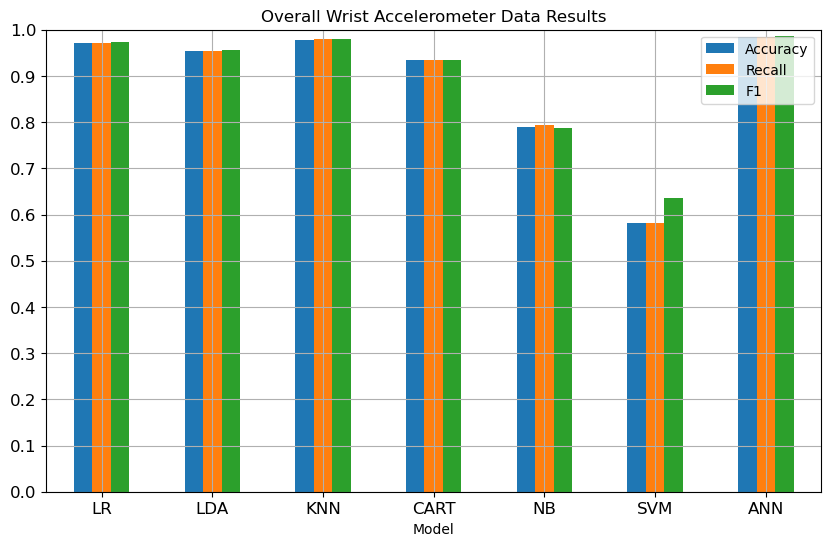

LR


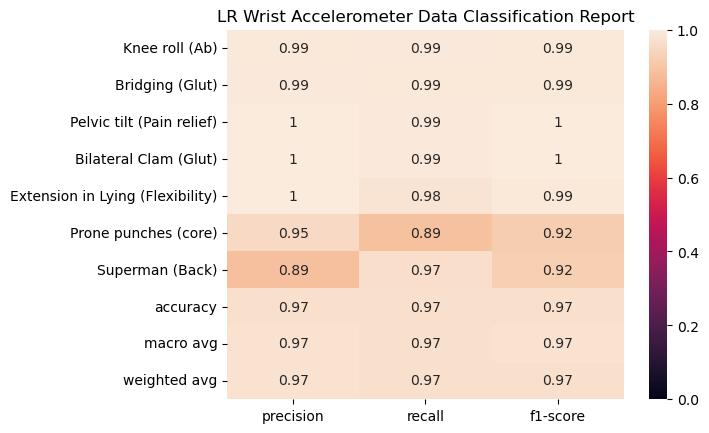

LDA


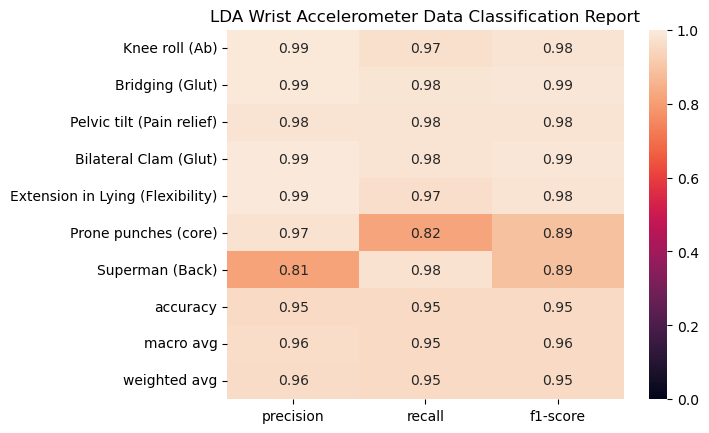

KNN


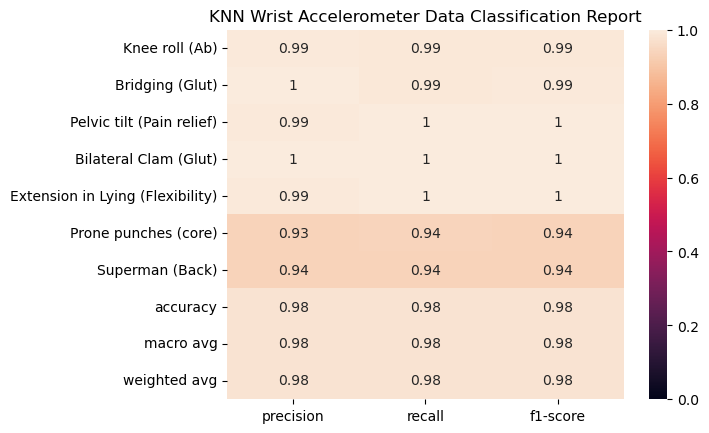

CART


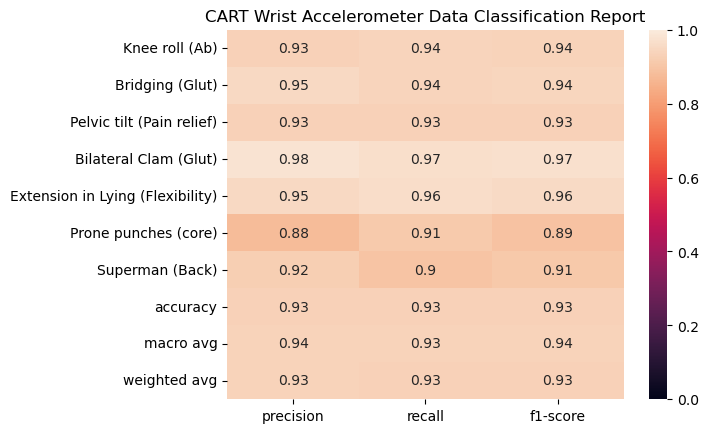

NB


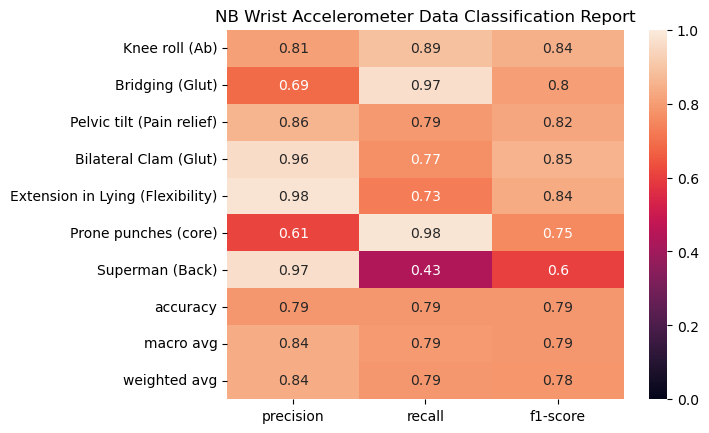

SVM


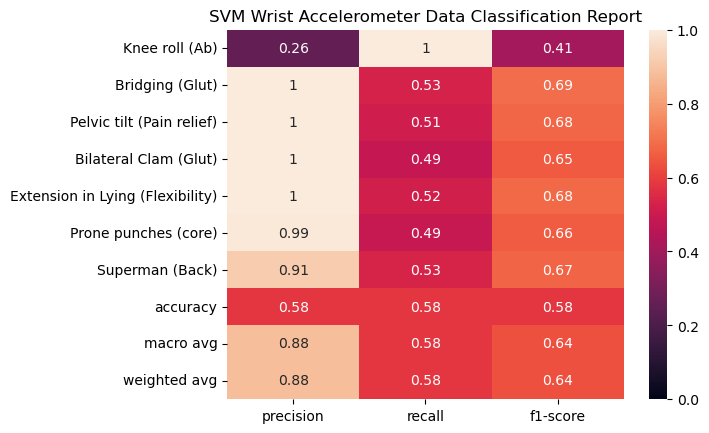

ANN


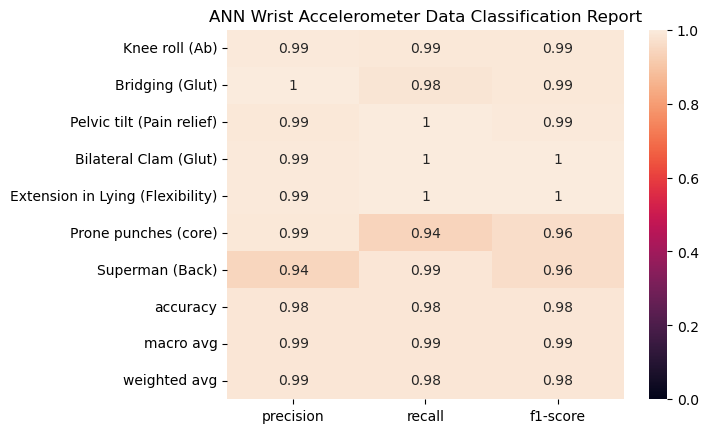

In [134]:
plot_overall_results(results, 'Overall Wrist Accelerometer Data Results')
plot_classification_report_heatmap(clf_report, 'Wrist Accelerometer Data Classification Report')

### Thigh accelerometer evaluation

In [135]:
print('Running algorithms for thigh accelerometer data...')
# complete code here
results, clf_report = evaluate_models(act_x_std, y, models)


Running algorithms for thigh accelerometer data...
LR  Staring...
LR  Successfully
LDA  Staring...
LDA  Successfully
KNN  Staring...
KNN  Successfully
CART  Staring...
CART  Successfully
NB  Staring...
NB  Successfully
SVM  Staring...


c:\Users\sajmc\anaconda3\lib\site-packages\sklearn\metrics\_classification.py:2326: UserWarning: labels size, 4, does not match size of target_names, 7
  warnings.warn(


SVM  Successfully
ANN  Staring...
ANN  Successfully


  Model  Accuracy    Recall        F1
0    LR  0.847981  0.851652  0.850527
1   LDA  0.822644  0.827448  0.826232
2   KNN  0.847189  0.850865  0.850545
3  CART  0.909739  0.911707  0.911701
4    NB  0.670625  0.658523  0.657006
5   SVM  0.231196  0.239930  0.186668
6   ANN  0.909739  0.912042  0.912065


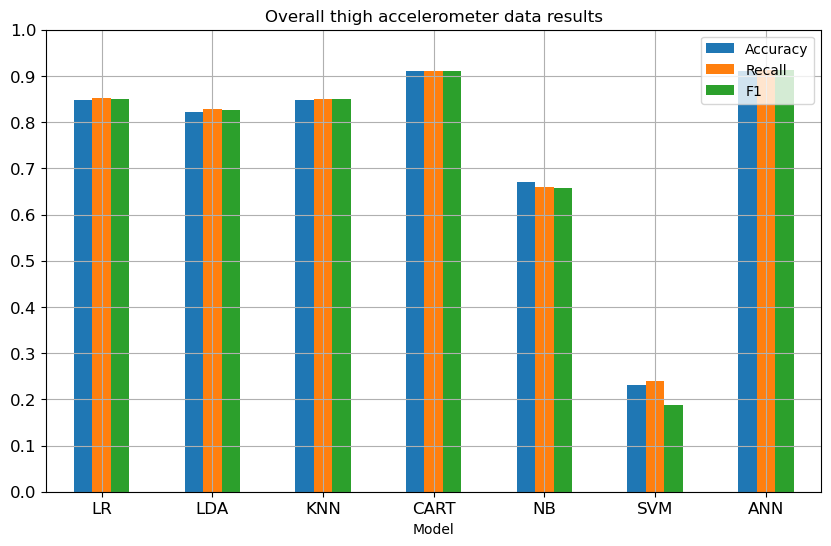

LR


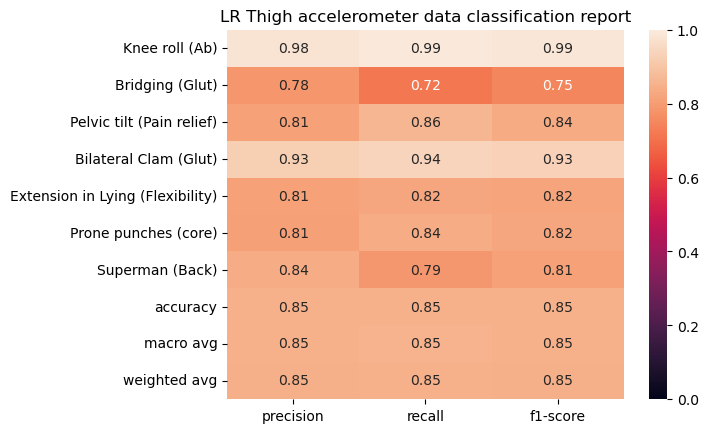

LDA


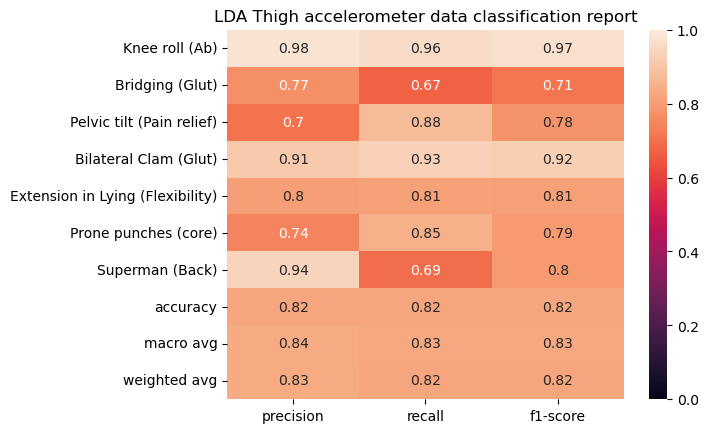

KNN


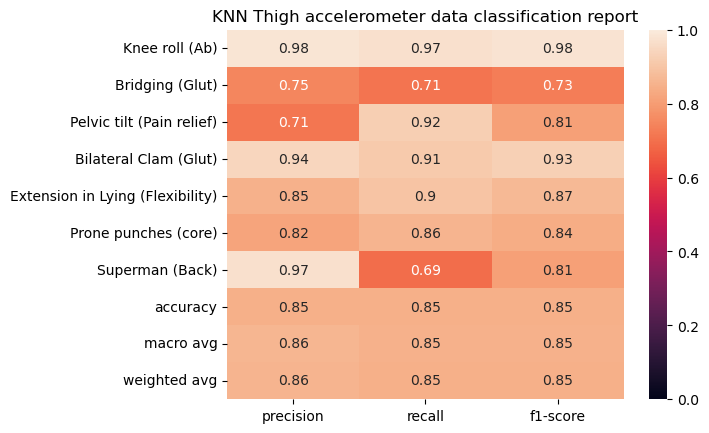

CART


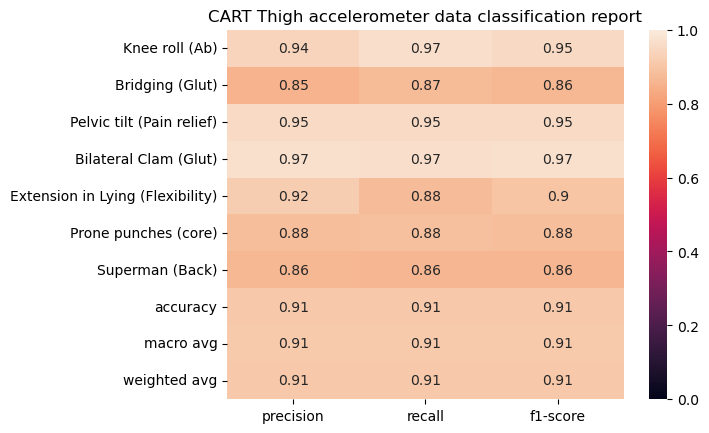

NB


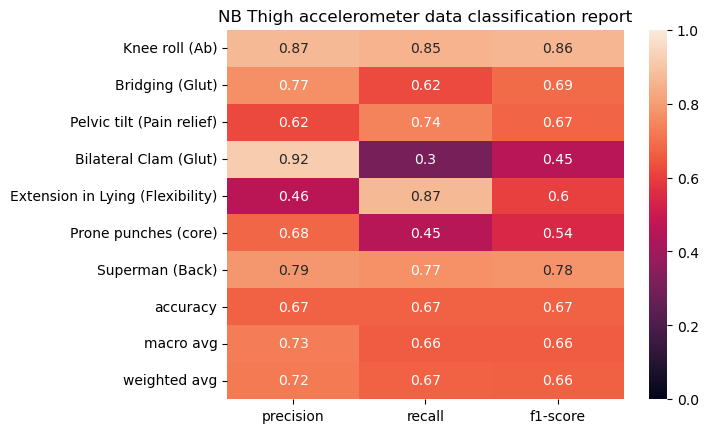

SVM


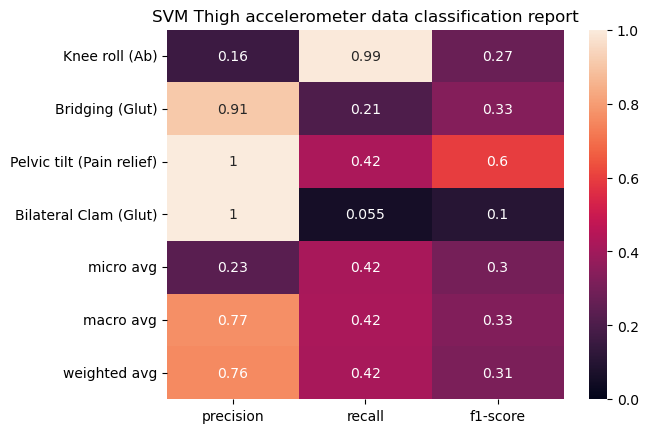

ANN


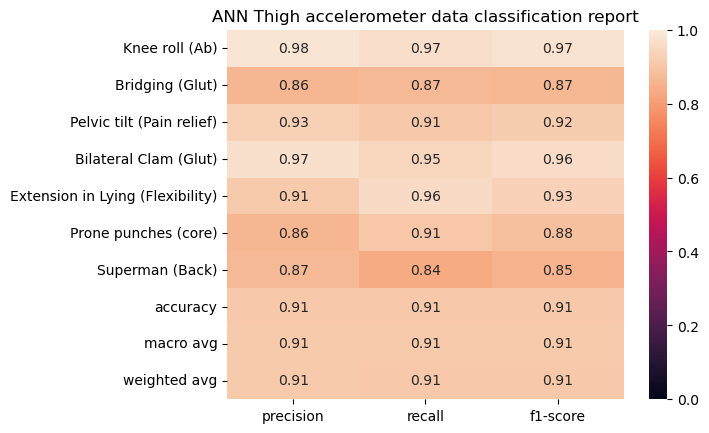

In [136]:
plot_overall_results(results, 'Overall thigh accelerometer data results')
plot_classification_report_heatmap(clf_report, 'Thigh accelerometer data classification report')

### Pressure mat data evaluation

In [137]:
print('Running algorithms for pressure mat data...')
# complete code here
results, clf_report = evaluate_models(pm_x_std, y, models)

Running algorithms for pressure mat data...
LR  Staring...
LR  Successfully
LDA  Staring...
LDA  Successfully
KNN  Staring...
KNN  Successfully
CART  Staring...
CART  Successfully
NB  Staring...
NB  Successfully
SVM  Staring...
SVM  Successfully
ANN  Staring...
ANN  Successfully


  Model  Accuracy    Recall        F1
0    LR  0.971496  0.971990  0.972845
1   LDA  0.953286  0.953419  0.955453
2   KNN  0.977831  0.978895  0.978949
3  CART  0.934283  0.935808  0.935539
4    NB  0.788599  0.793843  0.787169
5   SVM  0.581948  0.581842  0.635242
6   ANN  0.984956  0.985213  0.985514


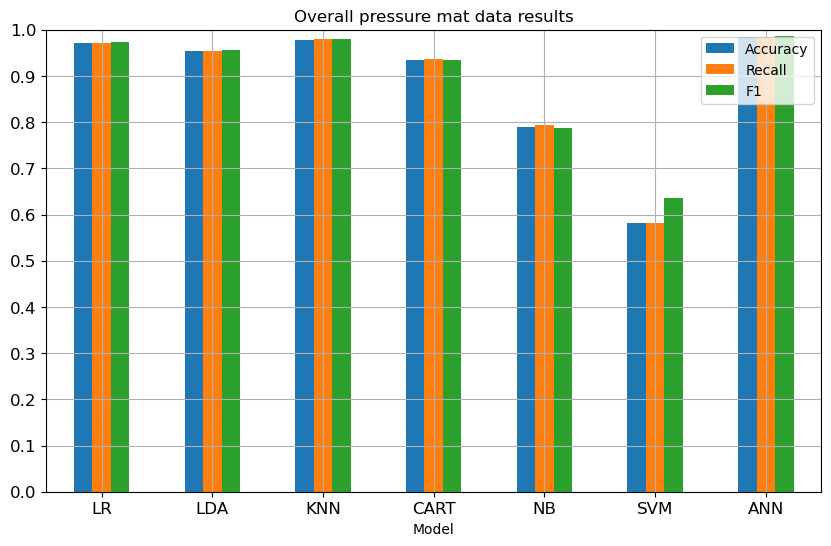

LR


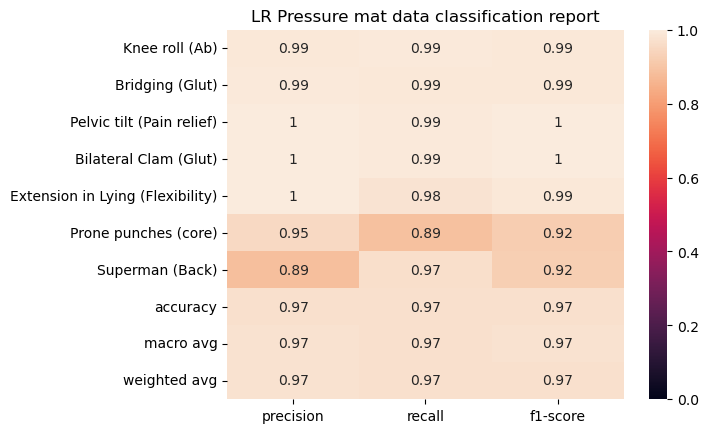

LDA


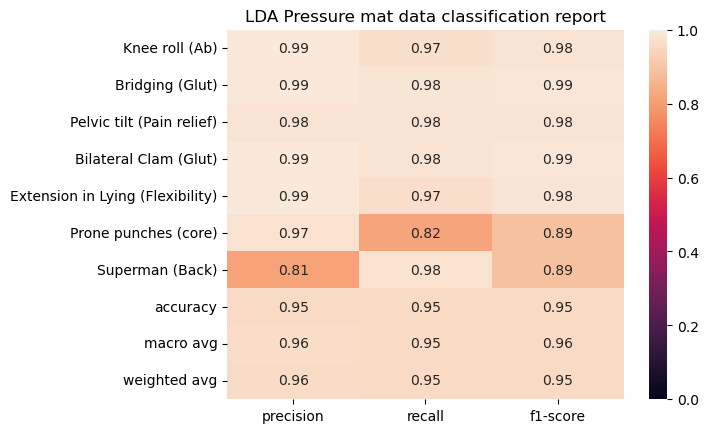

KNN


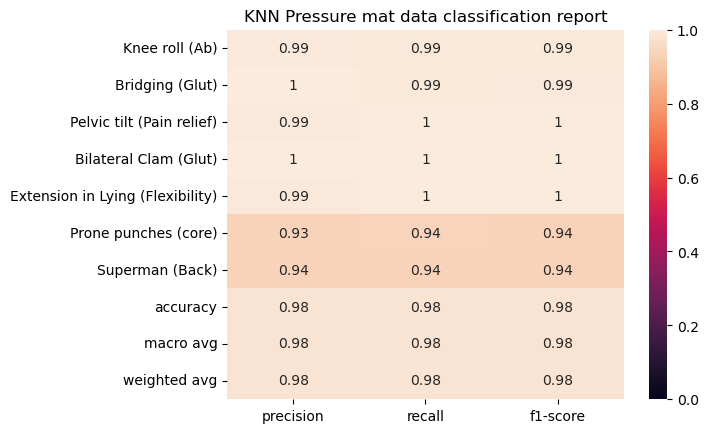

CART


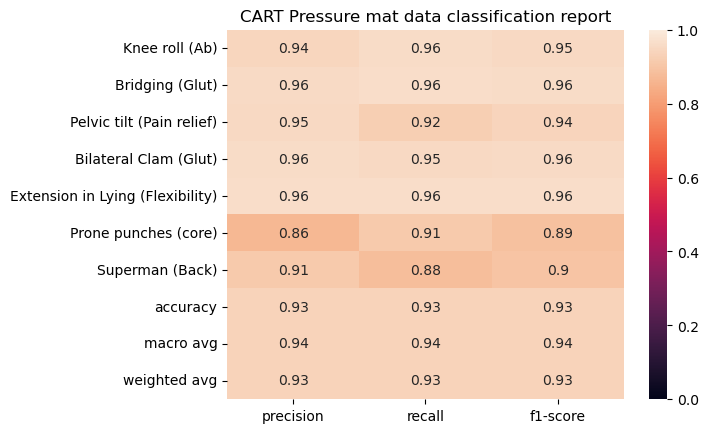

NB


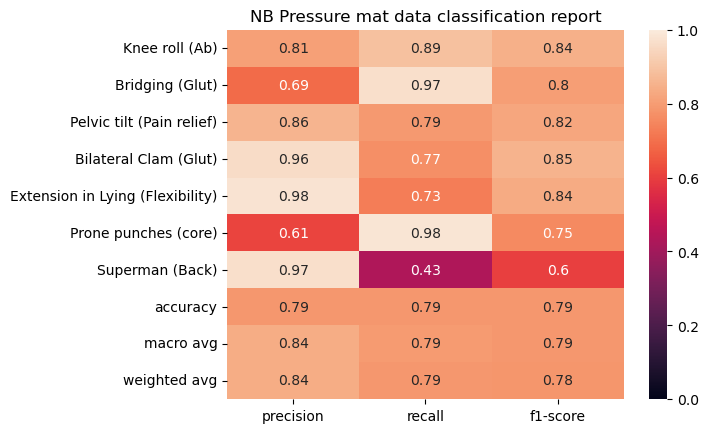

SVM


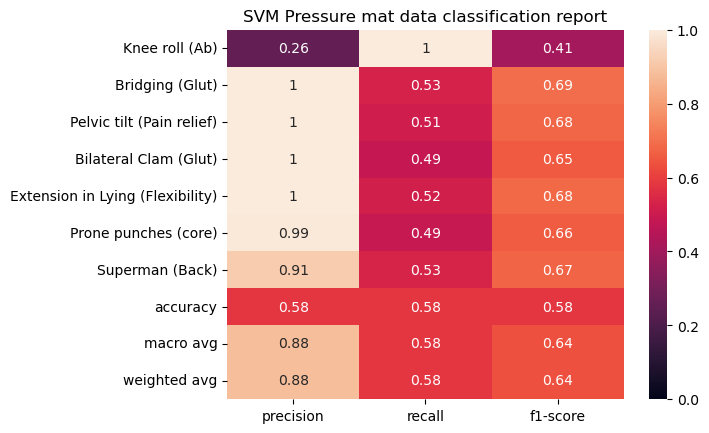

ANN


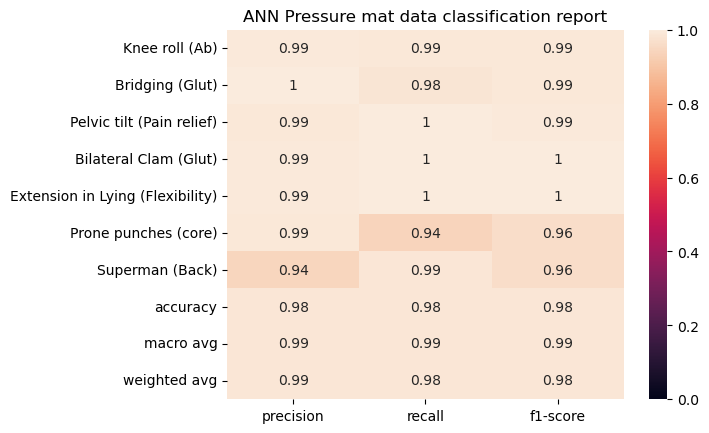

In [138]:
plot_overall_results(results, 'Overall pressure mat data results')
plot_classification_report_heatmap(clf_report, 'Pressure mat data classification report')

### Wrist and thigh accelerometer data evaluation

In [139]:
print('Running algorithms for wrist and thigh accelerometer data...')
# complete code here
results, clf_report = evaluate_models(wt_x_std, y, models)

Running algorithms for wrist and thigh accelerometer data...
LR  Staring...
LR  Successfully
LDA  Staring...
LDA  Successfully
KNN  Staring...
KNN  Successfully
CART  Staring...
CART  Successfully
NB  Staring...
NB  Successfully
SVM  Staring...


c:\Users\sajmc\anaconda3\lib\site-packages\sklearn\metrics\_classification.py:2326: UserWarning: labels size, 3, does not match size of target_names, 7
  warnings.warn(


SVM  Successfully
ANN  Staring...
ANN  Successfully


  Model  Accuracy    Recall        F1
0    LR  0.940618  0.943091  0.942467
1   LDA  0.908947  0.911788  0.911651
2   KNN  0.916073  0.919610  0.917520
3  CART  0.932700  0.934894  0.934056
4    NB  0.777514  0.769144  0.775850
5   SVM  0.209026  0.215900  0.152965
6   ANN  0.958036  0.959872  0.959722


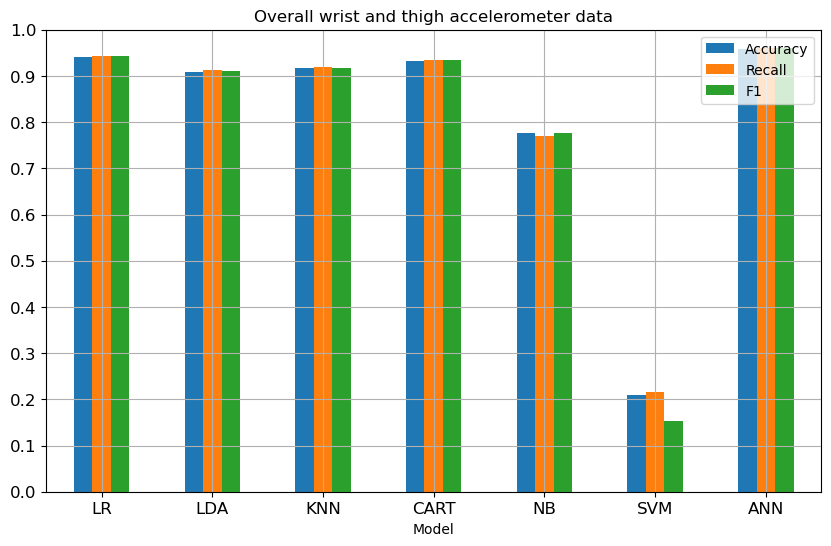

LR


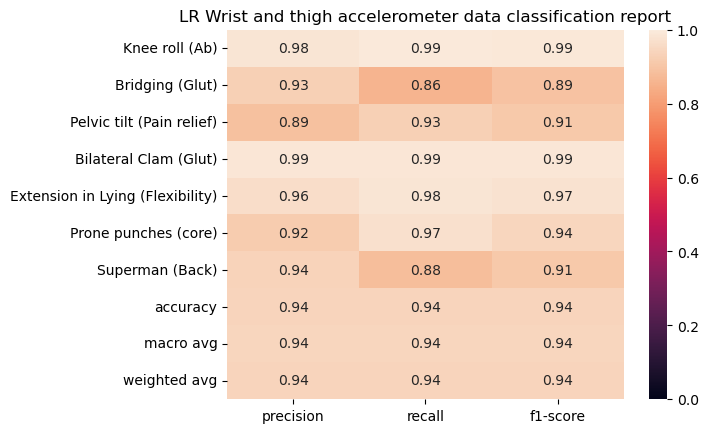

LDA


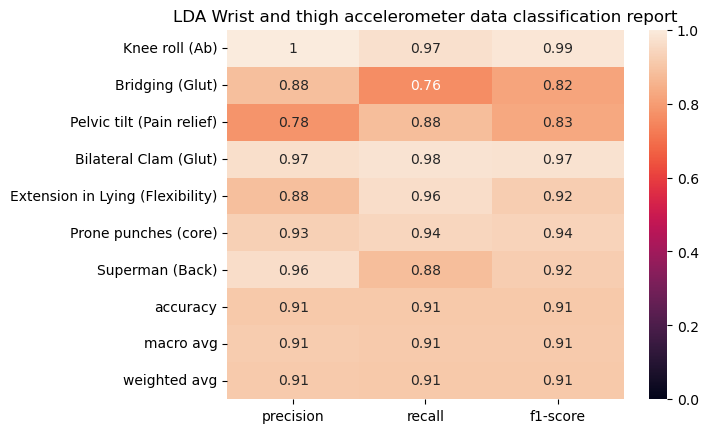

KNN


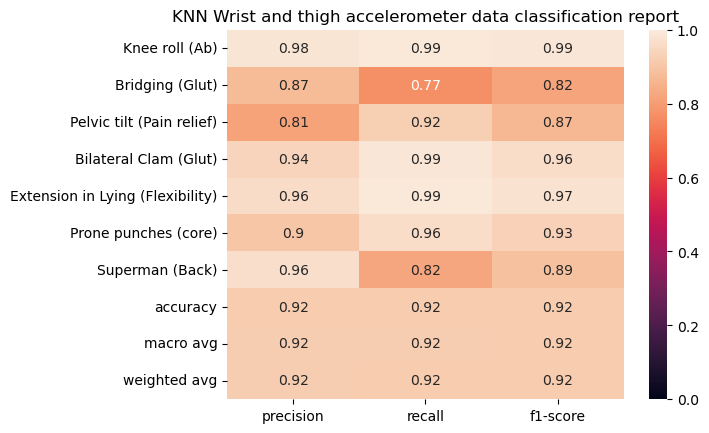

CART


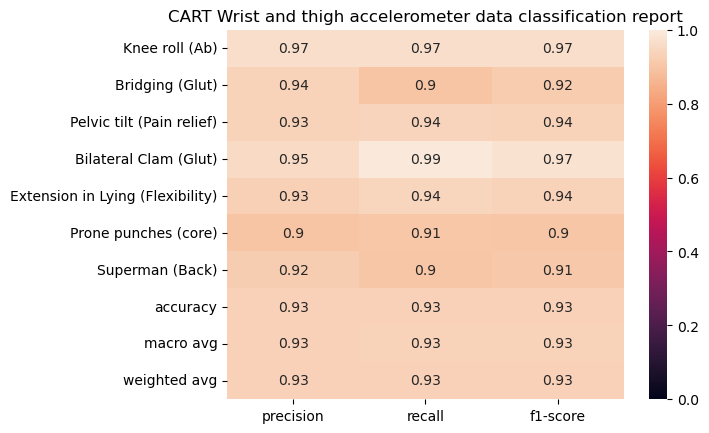

NB


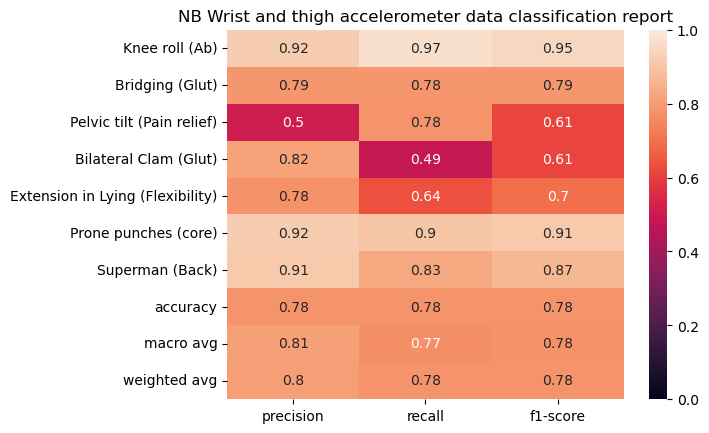

SVM


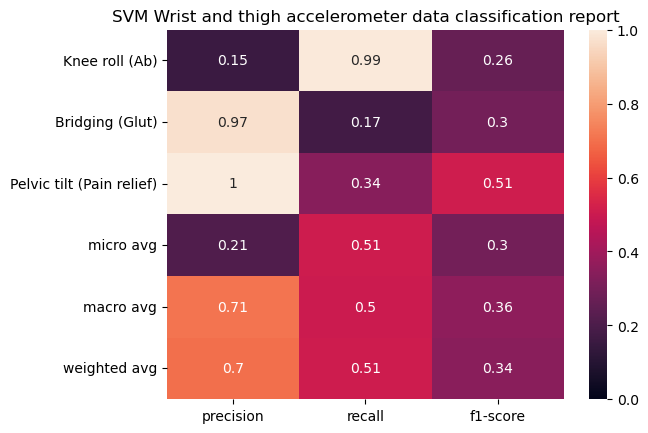

ANN


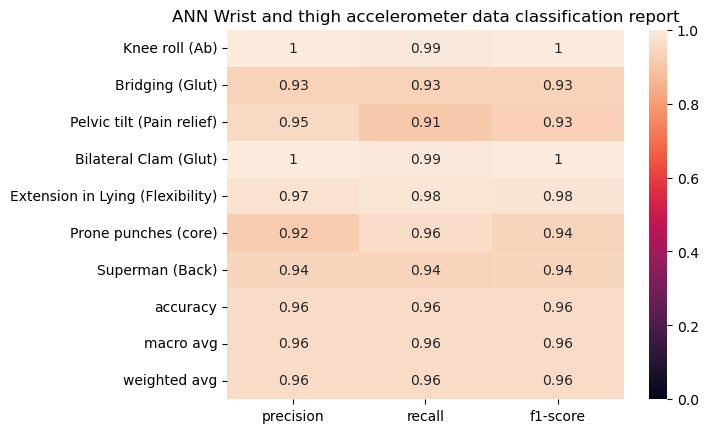

In [140]:
plot_overall_results(results, 'Overall wrist and thigh accelerometer data')
plot_classification_report_heatmap(clf_report, 'Wrist and thigh accelerometer data classification report')

### Wrist and thigh accelerometer data and pressure mat data evaluation

In [141]:
print('Running algorithms for wrist and thigh accelerometer data and pressure mat data...')
# complete code here
results, clf_report = evaluate_models(wtp_x_std, y, models)

Running algorithms for wrist and thigh accelerometer data and pressure mat data...
LR  Staring...
LR  Successfully
LDA  Staring...
LDA  Successfully
KNN  Staring...
KNN  Successfully
CART  Staring...
CART  Successfully
NB  Staring...
NB  Successfully
SVM  Staring...


c:\Users\sajmc\anaconda3\lib\site-packages\sklearn\metrics\_classification.py:2326: UserWarning: labels size, 2, does not match size of target_names, 7
  warnings.warn(


SVM  Successfully
ANN  Staring...
ANN  Successfully


  Model  Accuracy    Recall        F1
0    LR  0.988124  0.988824  0.988636
1   LDA  0.993666  0.993943  0.993962
2   KNN  0.980998  0.982091  0.981777
3  CART  0.960412  0.962166  0.961744
4    NB  0.878068  0.876526  0.878245
5   SVM  0.147268  0.147750  0.045398
6   ANN  0.989707  0.990088  0.990144


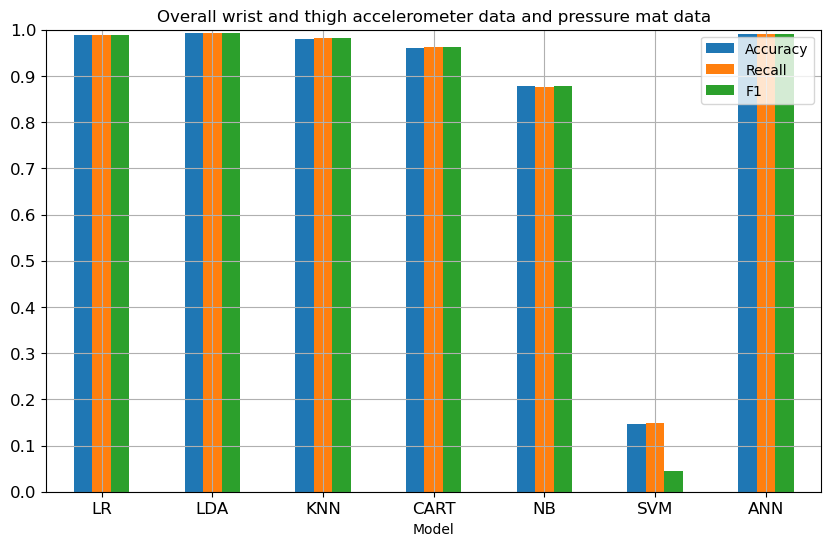

LR


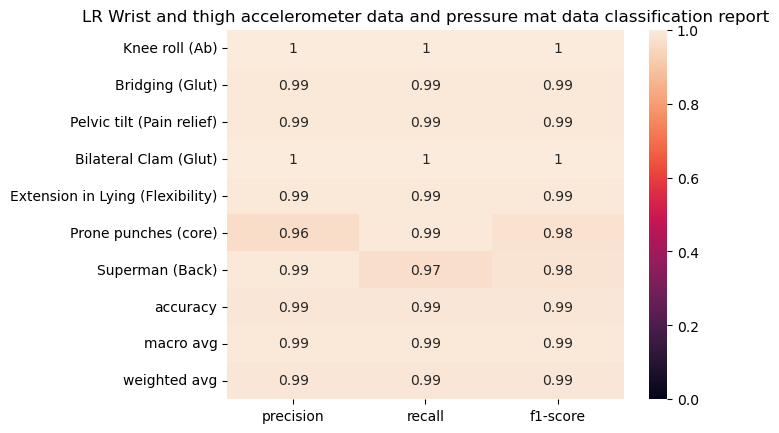

LDA


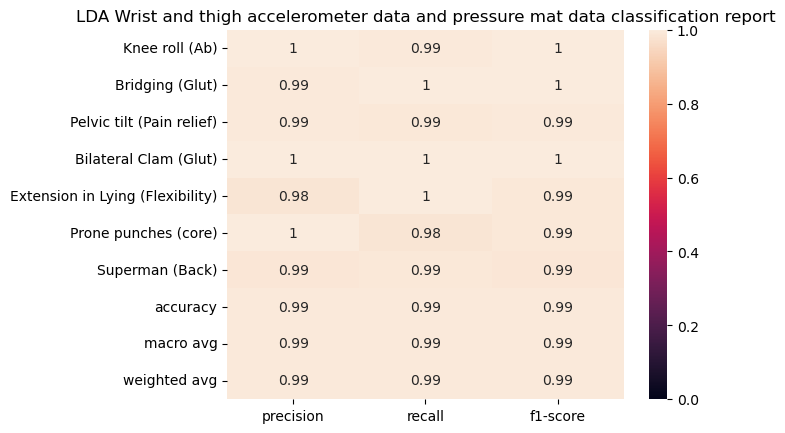

KNN


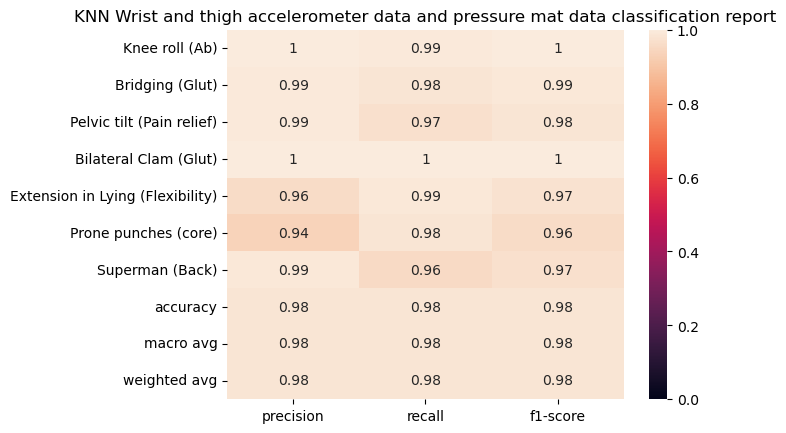

CART


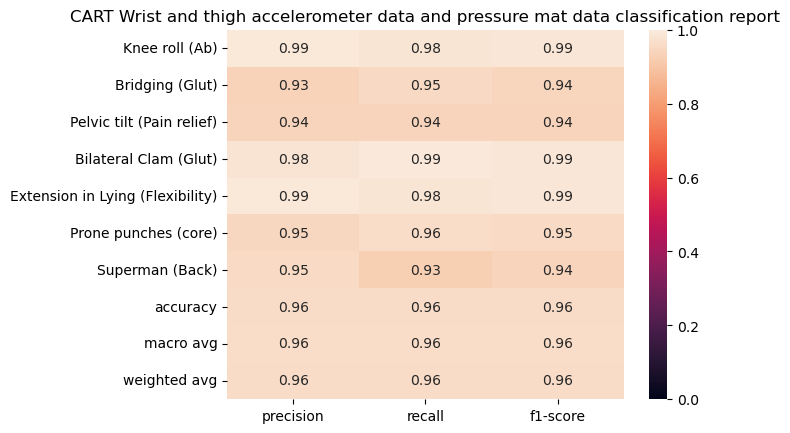

NB


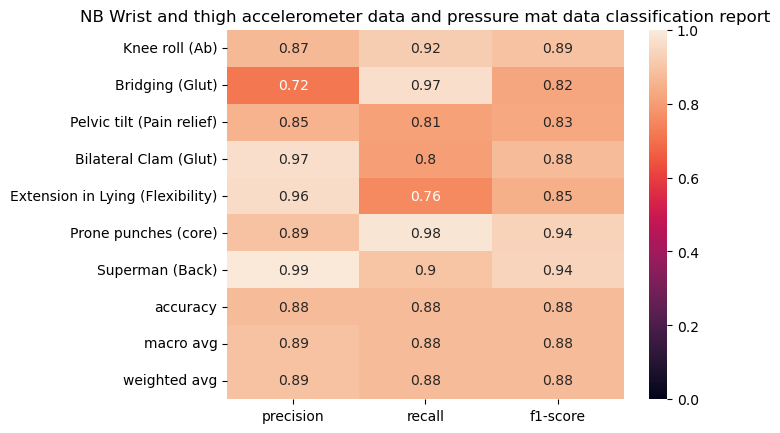

SVM


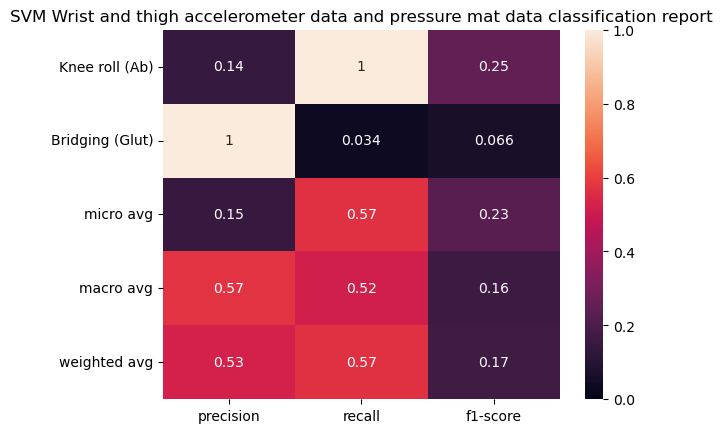

ANN


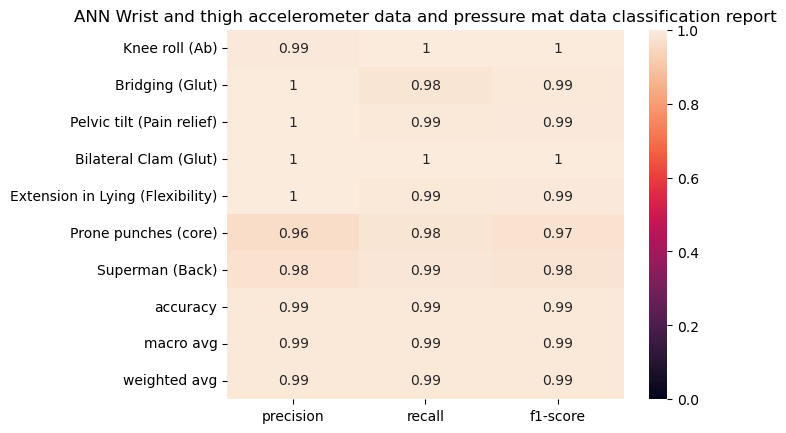

In [142]:
plot_overall_results(results, 'Overall wrist and thigh accelerometer data and pressure mat data')
plot_classification_report_heatmap(clf_report, 'Wrist and thigh accelerometer data and pressure mat data classification report')

# 2.2 Evaluate the role of persons data on classification

In [74]:
#print all unique person Ids
data[0].unique()

array([30, 22, 24, 25, 26,  1,  6,  7,  4, 23,  8,  9, 28, 29,  2,  3, 27,
       20, 21, 11, 10, 13, 12, 15, 14, 17, 16, 19, 18,  5], dtype=int64)

In [75]:
#helper function to split data by Leave-One-Person-Out
def lopo_split(df, indices=[], test_person=None):
    if test_person == None:
        print("Need test person id")
        return
    if len(indices) == 0 | len(indices)>2 | indices[0]<1 | indices[1]>872 | indices[0]>indices[1]:
        print("Need valid indices")
        return

    train_df = df[df[0]!=test_person]
    test_df = df[df[0]==test_person]
    X_train = train_df.iloc[:, indices[0]:indices[1]].to_numpy()
    X_test = test_df.iloc[:, indices[0]:indices[1]].to_numpy()
    y_train = train_df.iloc[:, 873].to_numpy()
    y_test = test_df.iloc[:, 873].to_numpy()

    return X_train, X_test, y_train, y_test


In [76]:
#testing helper method
#indicies indicate the sensor or sensors needed
X_train, X_test, y_train, y_test = lopo_split(data, indices=[1, 181], test_person=1)
print(X_train.shape)
print(X_test.shape)
print(y_train.shape)
print(y_test.shape)

(6087, 180)
(226, 180)
(6087,)
(226,)


In [77]:
print('Running algorithms for wrist accelerometer data...')

# complete code here

Running algorithms for wrist accelerometer data...


In [78]:
print('Running algorithms for thigh accelerometer data...')

# complete code here

Running algorithms for thigh accelerometer data...


In [79]:
print('Running algorithms for pressure mat data...')

# complete code here

Running algorithms for pressure mat data...


In [80]:
print('Running algorithms for wrist and thigh accelerometer data and pressure mat data...')

# complete code here

Running algorithms for wrist and thigh accelerometer data and pressure mat data...
